In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [73]:
df=pd.read_csv("res/boston_house.csv")
df=df.interpolate()
df.rename(columns={'MEDV':'Target'},inplace=True)
x = pd.DataFrame(np.array(df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']]))
y = pd.DataFrame(np.array(df['Target']))

In [74]:
# trian test splite
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [75]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

#fitting the data
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [76]:
from sklearn.linear_model import Ridge

In [77]:
from sklearn.model_selection import GridSearchCV

In [78]:
ridge_regression=Ridge()

In [79]:
ridge_regression

Ridge()

In [80]:
parameters={'alpha':[1,2,5,10,20,50,100]}
ridgecv=GridSearchCV(ridge_regression,parameters,scoring='neg_mean_squared_error',cv=5)


In [81]:
ridgecv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 50, 100]},
             scoring='neg_mean_squared_error')

In [82]:
print(ridgecv.best_params_)

{'alpha': 2}


In [83]:
print(ridgecv.best_score_)

-23.646284736453758


In [84]:
ridge_predct=ridgecv.predict(x_test)

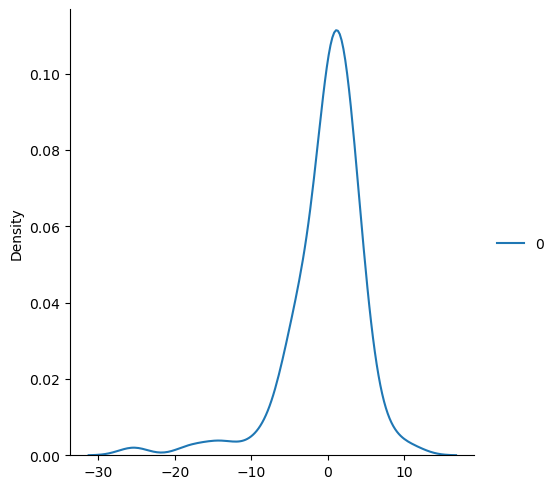

In [85]:
sns.displot(ridge_predct-y_test,kind='kde')

In [86]:
from sklearn.metrics import r2_score

In [87]:
r_square=r2_score(ridge_predct,y_test)
print(r_square) 

0.6284733581101556
